  # Chapter 4 - Classification
  ## LAB
  ### 4.7.1 The Stock Market Data

In [69]:
using BenchmarkTools
using DataFrames
using DelimitedFiles
using CSV
using Plots
using GLM
using Statistics

In [70]:
df = CSV.read("Data/Smarket.csv",DataFrame)
df=select!(df,Not(1))

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,String7
1,2001,0.381,-0.192,-2.624,-1.055,5.01,1.1913,0.959,Up
2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
4,2001,-0.623,1.032,0.959,0.381,-0.192,1.276,0.614,Up
5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up
6,2001,0.213,0.614,-0.623,1.032,0.959,1.3491,1.392,Up
7,2001,1.392,0.213,0.614,-0.623,1.032,1.445,-0.403,Down
8,2001,-0.403,1.392,0.213,0.614,-0.623,1.4078,0.027,Up
9,2001,0.027,-0.403,1.392,0.213,0.614,1.164,1.303,Up


In [71]:
names(df)

9-element Array{String,1}:
 "Year"
 "Lag1"
 "Lag2"
 "Lag3"
 "Lag4"
 "Lag5"
 "Volume"
 "Today"
 "Direction"

In [72]:
size(df)

(1250, 9)

In [73]:
describe(df)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,Year,2003.02,2001,2003.0,2005,0,Int64
2,Lag1,0.0038344,-4.922,0.039,5.733,0,Float64
3,Lag2,0.0039192,-4.922,0.039,5.733,0,Float64
4,Lag3,0.001716,-4.922,0.0385,5.733,0,Float64
5,Lag4,0.001636,-4.922,0.0385,5.733,0,Float64
6,Lag5,0.0056096,-4.922,0.0385,5.733,0,Float64
7,Volume,1.4783,0.35607,1.42295,3.15247,0,Float64
8,Today,0.0031384,-4.922,0.0385,5.733,0,Float64
9,Direction,,Down,,Up,0,String7


In [74]:
df1=deepcopy(df)
cor(Matrix(select!(df1,Not(9))))

8×8 Array{Float64,2}:
 1.0         0.0296996    0.0305964    0.0331946   …   0.539006    0.0300952
 0.0296996   1.0         -0.0262943   -0.0108034       0.0409099  -0.026155
 0.0305964  -0.0262943    1.0         -0.0258967      -0.0433832  -0.01025
 0.0331946  -0.0108034   -0.0258967    1.0            -0.0418237  -0.00244765
 0.0356887  -0.00298591  -0.0108535   -0.024051       -0.0484142  -0.00689953
 0.029788   -0.00567461  -0.00355795  -0.0188083   …  -0.0220023  -0.0348601
 0.539006    0.0409099   -0.0433832   -0.0418237       1.0         0.0145918
 0.0300952  -0.026155    -0.01025     -0.00244765      0.0145918   1.0

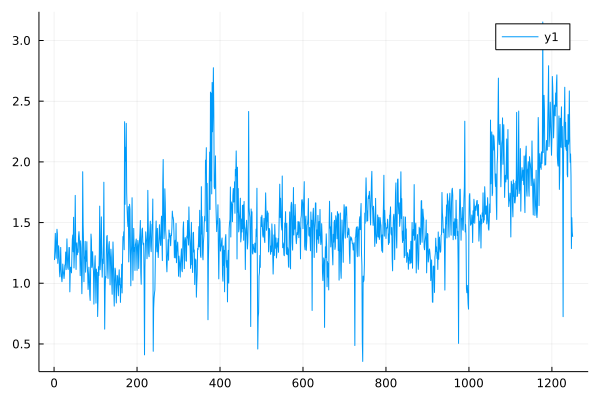

In [75]:
plot(df.Volume)

### 4.7.2 Logistic Regression

In [85]:
model=glm(@formula(Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume) ,df, Binomial(), ProbitLink())

LoadError: [91mMethodError: no method matching fit(::Type{GeneralizedLinearModel}, ::Array{Float64,2}, ::Array{Float64,2}, ::Binomial{Float64}, ::ProbitLink)[39m
[91m[0mClosest candidates are:[39m
[91m[0m  fit([91m::Type{StatsBase.Histogram}[39m, ::Any...; kwargs...) at /home/priyanshu/.julia/packages/StatsBase/pJqvO/src/hist.jl:383[39m
[91m[0m  fit([91m::Type{D}[39m, ::Any...) where D<:Distributions.Distribution at /home/priyanshu/.julia/packages/Distributions/N1Ika/src/genericfit.jl:34[39m
[91m[0m  fit(::Type{T}, [91m::FormulaTerm[39m, ::Any, ::Any...; contrasts, kwargs...) where T<:RegressionModel at /home/priyanshu/.julia/packages/StatsModels/m1jYD/src/statsmodel.jl:78[39m
[91m[0m  ...[39m